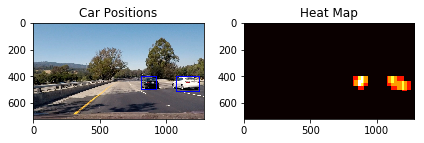

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
image = mpimg.imread('test_image.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    
    return heatmap
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


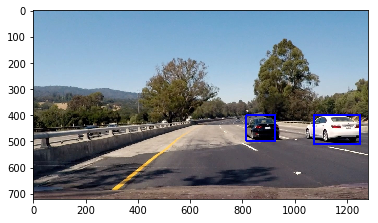

In [4]:
plt.imshow(draw_img)

In [5]:
print(box_list)

[((800, 400), (900, 500)), ((850, 400), (950, 500)), ((1050, 400), (1150, 500)), ((1100, 400), (1200, 500)), ((1150, 400), (1250, 500)), ((875, 400), (925, 450)), ((1075, 400), (1125, 450)), ((825, 425), (875, 475)), ((814, 400), (889, 475)), ((851, 400), (926, 475)), ((1073, 400), (1148, 475)), ((1147, 437), (1222, 512)), ((1184, 437), (1259, 512)), ((400, 400), (500, 500))]


In [6]:
from collections import deque
from scipy.ndimage.measurements import label

class DetectorMediator:
    def __init__(self, image):
        
        #box lists for the past 5 frames
        self.boxes_que = dequeue(maxlen=5)
        self.heatmap = None
        self.image = image
    
    def add_heat(self, heatmap, bbox_list):
        # Iterate through list of bboxes
        for box in bbox_list:
            # Add += 1 for all pixels inside each bbox
            # Assuming each "box" takes the form ((x1, y1), (x2, y2))
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

        return heatmap
    
    def apply_threshold(self, threshold):
        
        checkmap = np.copy(self.heatmap)
        checkmap[checkmap <= threshold] = 0
        
        return checkmap
    
    def generate_heatmap(self):
        '''
        Generates the heatmap
        
        Doesn't return anything because it updates an instance var.
        
        This may affect runtime
        '''
        self.heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
        for i in self.boxes_que:
            for boxCoordList in i:
                self.heatmap = self.addheat(self.heatmap, boxCoordList)
    
    def draw_labeled_bboxes(self, img, labels):
        # Iterate through all detected cars
        for car_number in range(1, labels[1]+1):
            # Find pixels with each car_number label value
            nonzero = (labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        # Return the image
        return img
        
    def detect_vehicles(self, input_image, box_list):
        
        self.image = input_image
        
        self.boxes_que.append(box_list)
        self.generate_heatmap()
        
        thresholded_img = self.apply_threshold( 1 )
        
        labels = label(thresholded_img)
        
        output_image = self.draw_labeled_bboxes(self.image, labels)
        
        return output_image
        


In [ ]:
if frameno % 5 == 0:
    w_dim = 1309